#**CROP YIELD PREDICTION**

In [91]:
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving project.csv to project (3).csv


In [92]:
import pandas as pd
import io
  
df = pd.read_csv(io.BytesIO(uploaded['project.csv']),encoding='cp1252')
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1,20.770894,2.068260,1014.863796,21.947147,loamy,56.070,0.000,0.000,1113.0
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600,20.160426,1.976480,1015.193528,20.643237,sandy,9.000,9.000,0.000,6300.0
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100,21.998299,2.000524,1014.184607,21.422312,clay,0.000,0.000,0.000,152800.0
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800,21.776377,2.019750,1015.053118,21.810567,chalky,38.250,38.250,38.250,18600.0
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900,20.075734,1.974351,1015.170238,21.930206,clay,0.000,23.184,0.000,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0
12624,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0
12625,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0
12626,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12628 entries, 0 to 12627
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12628 non-null  int64  
 1   state_names     12628 non-null  object 
 2   district_names  12628 non-null  object 
 3   crop_year       12628 non-null  int64  
 4   season_names    12628 non-null  object 
 5   crop_names      12628 non-null  object 
 6   area            12628 non-null  int64  
 7   temperature     12628 non-null  float64
 8   wind_speed      12628 non-null  float64
 9   pressure        12628 non-null  float64
 10  humidity        12628 non-null  float64
 11  soil_type       12628 non-null  object 
 12  N               12628 non-null  float64
 13  P               12628 non-null  float64
 14  K               12628 non-null  float64
 15  production      12496 non-null  float64
dtypes: float64(8), int64(3), object(5)
memory usage: 1.5+ MB


In [94]:
df.columns


Index(['Unnamed: 0', 'state_names', 'district_names', 'crop_year',
       'season_names', 'crop_names', 'area', 'temperature', 'wind_speed',
       'pressure', 'humidity', 'soil_type', 'N', 'P', 'K', 'production'],
      dtype='object')

In [95]:
df.isnull().sum()

Unnamed: 0          0
state_names         0
district_names      0
crop_year           0
season_names        0
crop_names          0
area                0
temperature         0
wind_speed          0
pressure            0
humidity            0
soil_type           0
N                   0
P                   0
K                   0
production        132
dtype: int64

In [96]:
df = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [97]:
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1,20.770894,2.068260,1014.863796,21.947147,loamy,56.070,0.000,0.000,1113.0
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600,20.160426,1.976480,1015.193528,20.643237,sandy,9.000,9.000,0.000,6300.0
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100,21.998299,2.000524,1014.184607,21.422312,clay,0.000,0.000,0.000,152800.0
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800,21.776377,2.019750,1015.053118,21.810567,chalky,38.250,38.250,38.250,18600.0
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900,20.075734,1.974351,1015.170238,21.930206,clay,0.000,23.184,0.000,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0
12624,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0
12625,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0
12626,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0


In [98]:
df.isnull().sum()

Unnamed: 0        0
state_names       0
district_names    0
crop_year         0
season_names      0
crop_names        0
area              0
temperature       0
wind_speed        0
pressure          0
humidity          0
soil_type         0
N                 0
P                 0
K                 0
production        0
dtype: int64

##Corelation Heatmap

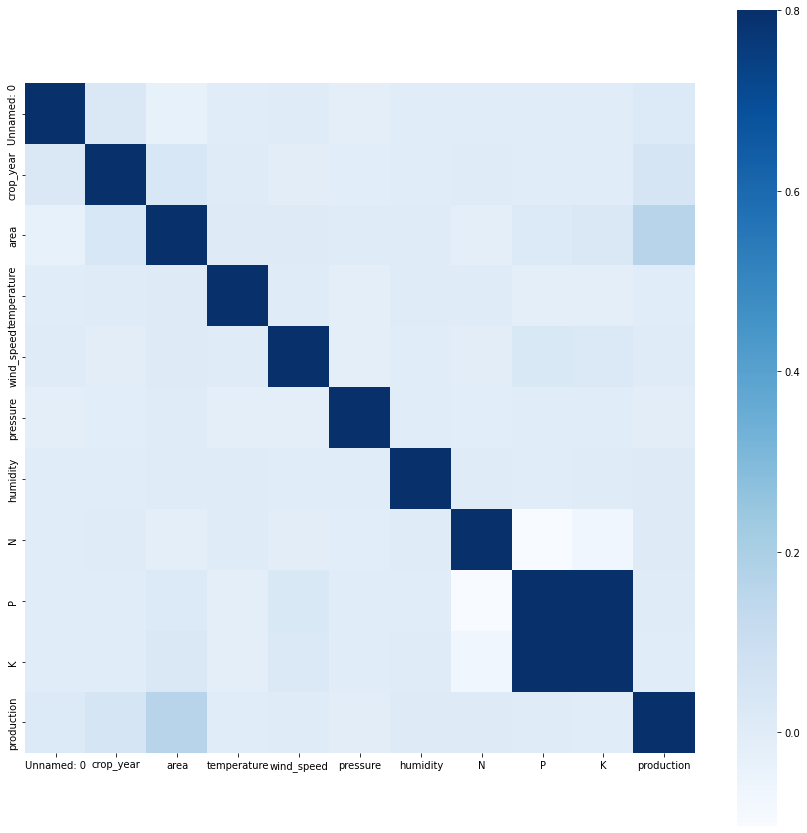

In [99]:
import matplotlib.pyplot as plt
import seaborn as sb

C_mat = df.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True,cmap="Blues")
plt.show()

In [100]:
df = df[df['crop_year']>=2005]
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production
244,125435,Maharashtra,AHMEDNAGAR,2005,Kharif,Arhar/Tur,11100,20.966019,2.108367,1015.568463,21.070974,sandy,3.610,9.386,9.386,3800.0
245,125436,Maharashtra,AHMEDNAGAR,2005,Kharif,Bajra,217700,20.929952,1.971982,1014.948978,20.957359,peaty,37.704,100.544,50.272,54800.0
246,125437,Maharashtra,AHMEDNAGAR,2005,Kharif,Castor seed,400,20.346375,2.059649,1014.624347,21.487566,peaty,4.620,4.620,0.000,100.0
247,125438,Maharashtra,AHMEDNAGAR,2005,Kharif,Cotton(lint),16600,20.310043,2.022520,1013.479437,21.359857,clay,2.422,6.055,2.422,22800.0
248,125439,Maharashtra,AHMEDNAGAR,2005,Kharif,Groundnut,4900,20.996850,2.023504,1013.817687,20.915971,sandy,0.000,0.000,0.000,2400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0
12624,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0
12625,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0
12626,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6440 entries, 244 to 12627
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      6440 non-null   int64  
 1   state_names     6440 non-null   object 
 2   district_names  6440 non-null   object 
 3   crop_year       6440 non-null   int64  
 4   season_names    6440 non-null   object 
 5   crop_names      6440 non-null   object 
 6   area            6440 non-null   int64  
 7   temperature     6440 non-null   float64
 8   wind_speed      6440 non-null   float64
 9   pressure        6440 non-null   float64
 10  humidity        6440 non-null   float64
 11  soil_type       6440 non-null   object 
 12  N               6440 non-null   float64
 13  P               6440 non-null   float64
 14  K               6440 non-null   float64
 15  production      6440 non-null   float64
dtypes: float64(8), int64(3), object(5)
memory usage: 855.3+ KB


##converting data to numerical form

In [59]:
df = df.join(pd.get_dummies(df['district_names']))
df = df.join(pd.get_dummies(df['season_names']))
df = df.join(pd.get_dummies(df['crop_names']))
df = df.join(pd.get_dummies(df['state_names']))
df = df.join(pd.get_dummies(df['soil_type']))
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,...,Urad,Wheat,Maharashtra,chalky,clay,loamy,peaty,sandy,silt,silty
244,125435,Maharashtra,AHMEDNAGAR,2005,Kharif,Arhar/Tur,11100,20.966019,2.108367,1015.568463,...,0,0,1,0,0,0,0,1,0,0
245,125436,Maharashtra,AHMEDNAGAR,2005,Kharif,Bajra,217700,20.929952,1.971982,1014.948978,...,0,0,1,0,0,0,1,0,0,0
246,125437,Maharashtra,AHMEDNAGAR,2005,Kharif,Castor seed,400,20.346375,2.059649,1014.624347,...,0,0,1,0,0,0,1,0,0,0
247,125438,Maharashtra,AHMEDNAGAR,2005,Kharif,Cotton(lint),16600,20.310043,2.022520,1013.479437,...,0,0,1,0,1,0,0,0,0,0
248,125439,Maharashtra,AHMEDNAGAR,2005,Kharif,Groundnut,4900,20.996850,2.023504,1013.817687,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000,21.635879,2.000060,1014.302213,...,0,0,1,0,0,0,0,0,0,1
12624,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300,21.709611,2.053609,1015.803912,...,0,0,1,0,0,0,0,0,1,0
12625,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100,21.851730,2.027476,1014.031903,...,0,1,1,0,0,0,0,1,0,0
12626,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400,21.569380,2.004421,1013.989125,...,0,0,1,1,0,0,0,0,0,0


In [61]:
df['Yield'] = df['production']/df['area']
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,...,Wheat,Maharashtra,chalky,clay,loamy,peaty,sandy,silt,silty,Yield
244,125435,Maharashtra,AHMEDNAGAR,2005,Kharif,Arhar/Tur,11100,20.966019,2.108367,1015.568463,...,0,1,0,0,0,0,1,0,0,0.342342
245,125436,Maharashtra,AHMEDNAGAR,2005,Kharif,Bajra,217700,20.929952,1.971982,1014.948978,...,0,1,0,0,0,1,0,0,0,0.251723
246,125437,Maharashtra,AHMEDNAGAR,2005,Kharif,Castor seed,400,20.346375,2.059649,1014.624347,...,0,1,0,0,0,1,0,0,0,0.250000
247,125438,Maharashtra,AHMEDNAGAR,2005,Kharif,Cotton(lint),16600,20.310043,2.022520,1013.479437,...,0,1,0,1,0,0,0,0,0,1.373494
248,125439,Maharashtra,AHMEDNAGAR,2005,Kharif,Groundnut,4900,20.996850,2.023504,1013.817687,...,0,1,0,0,0,0,1,0,0,0.489796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000,21.635879,2.000060,1014.302213,...,0,1,0,0,0,0,0,0,1,0.825000
12624,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300,21.709611,2.053609,1015.803912,...,0,1,0,0,0,0,0,1,0,0.153846
12625,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100,21.851730,2.027476,1014.031903,...,1,1,0,0,0,0,1,0,0,0.920962
12626,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400,21.569380,2.004421,1013.989125,...,0,1,1,0,0,0,0,0,0,1.223404


##Dropping Unecessory Columns

In [62]:
df=df.drop('district_names', axis=1)
df = df.drop('season_names',axis=1)
df = df.drop('crop_names',axis=1)




In [63]:
df = df.drop('state_names', axis=1)
df = df.drop('soil_type', axis=1)
df

,Unnamed: 0,crop_year,area,temperature,wind_speed,pressure,humidity,N,P,K,...,Wheat,Maharashtra,chalky,clay,loamy,peaty,sandy,silt,silty,Yield
244,125435,2005,11100,20.966019,2.108367,1015.568463,21.070974,3.610,9.386,9.386,...,0,1,0,0,0,0,1,0,0,0.342342
245,125436,2005,217700,20.929952,1.971982,1014.948978,20.957359,37.704,100.544,50.272,...,0,1,0,0,0,1,0,0,0,0.251723
246,125437,2005,400,20.346375,2.059649,1014.624347,21.487566,4.620,4.620,0.000,...,0,1,0,0,0,1,0,0,0,0.250000
247,125438,2005,16600,20.310043,2.022520,1013.479437,21.359857,2.422,6.055,2.422,...,0,1,0,1,0,0,0,0,0,1.373494
248,125439,2005,4900,20.996850,2.023504,1013.817687,20.915971,0.000,0.000,0.000,...,0,1,0,0,0,0,1,0,0,0.489796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,2014,4000,21.635879,2.000060,1014.302213,20.060662,7.840,7.840,0.000,...,0,1,0,0,0,0,0,0,1,0.825000
12624,137815,2014,1300,21.709611,2.053609,1015.803912,21.263478,7.504,18.760,7.504,...,0,1,0,0,0,0,0,1,0,0.153846
12625,137816,2014,29100,21.851730,2.027476,1014.031903,20.059945,0.000,0.000,0.000,...,1,1,0,0,0,0,1,0,0,0.920962
12626,137817,2014,9400,21.569380,2.004421,1013.989125,21.835158,2.896,3.620,0.000,...,0,1,1,0,0,0,0,0,0,1.223404


In [64]:
df= df.drop('Unnamed: 0', axis = 1)


In [65]:
df

,crop_year,area,temperature,wind_speed,pressure,humidity,N,P,K,production,...,Wheat,Maharashtra,chalky,clay,loamy,peaty,sandy,silt,silty,Yield
244,2005,11100,20.966019,2.108367,1015.568463,21.070974,3.610,9.386,9.386,3800.0,...,0,1,0,0,0,0,1,0,0,0.342342
245,2005,217700,20.929952,1.971982,1014.948978,20.957359,37.704,100.544,50.272,54800.0,...,0,1,0,0,0,1,0,0,0,0.251723
246,2005,400,20.346375,2.059649,1014.624347,21.487566,4.620,4.620,0.000,100.0,...,0,1,0,0,0,1,0,0,0,0.250000
247,2005,16600,20.310043,2.022520,1013.479437,21.359857,2.422,6.055,2.422,22800.0,...,0,1,0,1,0,0,0,0,0,1.373494
248,2005,4900,20.996850,2.023504,1013.817687,20.915971,0.000,0.000,0.000,2400.0,...,0,1,0,0,0,0,1,0,0,0.489796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,2014,4000,21.635879,2.000060,1014.302213,20.060662,7.840,7.840,0.000,3300.0,...,0,1,0,0,0,0,0,0,1,0.825000
12624,2014,1300,21.709611,2.053609,1015.803912,21.263478,7.504,18.760,7.504,200.0,...,0,1,0,0,0,0,0,1,0,0.153846
12625,2014,29100,21.851730,2.027476,1014.031903,20.059945,0.000,0.000,0.000,26800.0,...,1,1,0,0,0,0,1,0,0,0.920962
12626,2014,9400,21.569380,2.004421,1013.989125,21.835158,2.896,3.620,0.000,11500.0,...,0,1,1,0,0,0,0,0,0,1.223404


##Preprocessing

In [66]:
from sklearn import preprocessing

In [67]:


x = df[['area']].values.astype(float)
x

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)


x_scaled

df['area'] = x_scaled
df

,crop_year,area,temperature,wind_speed,pressure,humidity,N,P,K,production,...,Wheat,Maharashtra,chalky,clay,loamy,peaty,sandy,silt,silty,Yield
244,2005,0.015604,20.966019,2.108367,1015.568463,21.070974,3.610,9.386,9.386,3800.0,...,0,1,0,0,0,0,1,0,0,0.342342
245,2005,0.306058,20.929952,1.971982,1014.948978,20.957359,37.704,100.544,50.272,54800.0,...,0,1,0,0,0,1,0,0,0,0.251723
246,2005,0.000561,20.346375,2.059649,1014.624347,21.487566,4.620,4.620,0.000,100.0,...,0,1,0,0,0,1,0,0,0,0.250000
247,2005,0.023336,20.310043,2.022520,1013.479437,21.359857,2.422,6.055,2.422,22800.0,...,0,1,0,1,0,0,0,0,0,1.373494
248,2005,0.006887,20.996850,2.023504,1013.817687,20.915971,0.000,0.000,0.000,2400.0,...,0,1,0,0,0,0,1,0,0,0.489796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,2014,0.005622,21.635879,2.000060,1014.302213,20.060662,7.840,7.840,0.000,3300.0,...,0,1,0,0,0,0,0,0,1,0.825000
12624,2014,0.001826,21.709611,2.053609,1015.803912,21.263478,7.504,18.760,7.504,200.0,...,0,1,0,0,0,0,0,1,0,0.153846
12625,2014,0.040910,21.851730,2.027476,1014.031903,20.059945,0.000,0.000,0.000,26800.0,...,1,1,0,0,0,0,1,0,0,0.920962
12626,2014,0.013214,21.569380,2.004421,1013.989125,21.835158,2.896,3.620,0.000,11500.0,...,0,1,1,0,0,0,0,0,0,1.223404


In [68]:
df.head()

,crop_year,area,temperature,wind_speed,pressure,humidity,N,P,K,production,...,Wheat,Maharashtra,chalky,clay,loamy,peaty,sandy,silt,silty,Yield
244,2005,0.015604,20.966019,2.108367,1015.568463,21.070974,3.610,9.386,9.386,3800.0,...,0,1,0,0,0,0,1,0,0,0.342342
245,2005,0.306058,20.929952,1.971982,1014.948978,20.957359,37.704,100.544,50.272,54800.0,...,0,1,0,0,0,1,0,0,0,0.251723
246,2005,0.000561,20.346375,2.059649,1014.624347,21.487566,4.620,4.620,0.000,100.0,...,0,1,0,0,0,1,0,0,0,0.250000
247,2005,0.023336,20.310043,2.022520,1013.479437,21.359857,2.422,6.055,2.422,22800.0,...,0,1,0,1,0,0,0,0,0,1.373494
248,2005,0.006887,20.996850,2.023504,1013.817687,20.915971,0.000,0.000,0.000,2400.0,...,0,1,0,0,0,0,1,0,0,0.489796


In [69]:
df.isnull().sum()

crop_year      0
area           0
temperature    0
wind_speed     0
pressure       0
              ..
peaty          0
sandy          0
silt           0
silty          0
Yield          0
Length: 81, dtype: int64

##Train and Test Split

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x=df

In [72]:
y = df['Yield']


In [73]:
x = df.drop('Yield', axis = 1)

In [74]:
len(x.columns)

80

In [77]:
x.columns

Index(['crop_year', 'area', 'temperature', 'wind_speed', 'pressure',
       'humidity', 'N', 'P', 'K', 'production', 'AHMEDNAGAR', 'AKOLA',
       'AMRAVATI', 'AURANGABAD', 'BEED', 'BHANDARA', 'BULDHANA', 'CHANDRAPUR',
       'DHULE', 'GADCHIROLI', 'GONDIA', 'HINGOLI', 'JALGAON', 'JALNA',
       'KOLHAPUR', 'LATUR', 'NAGPUR', 'NANDED', 'NANDURBAR', 'NASHIK',
       'OSMANABAD', 'PALGHAR', 'PARBHANI', 'PUNE', 'RAIGAD', 'RATNAGIRI',
       'SANGLI', 'SATARA', 'SINDHUDURG', 'SOLAPUR', 'THANE', 'WARDHA',
       'WASHIM', 'YAVATMAL', 'Kharif     ', 'Rabi       ', 'Summer     ',
       'Whole Year ', 'Arhar/Tur', 'Bajra', 'Castor seed', 'Cotton(lint)',
       'Gram', 'Groundnut', 'Jowar', 'Linseed', 'Maize', 'Moong(Green Gram)',
       'Niger seed', 'Other  Rabi pulses', 'Other Kharif pulses', 'Ragi',
       'Rapeseed &Mustard', 'Rice', 'Safflower', 'Sesamum', 'Soyabean',
       'Sugarcane', 'Sunflower', 'Tobacco', 'Urad', 'Wheat', 'Maharashtra',
       'chalky', 'clay', 'loamy', 'peaty', 's

In [78]:
features_list=['crop_year', 'area', 'temperature', 'wind_speed', 'pressure',
       'humidity', 'N', 'P', 'K', 'production', 'AHMEDNAGAR', 'AKOLA',
       'AMRAVATI', 'AURANGABAD', 'BEED', 'BHANDARA', 'BULDHANA', 'CHANDRAPUR',
       'DHULE', 'GADCHIROLI', 'GONDIA', 'HINGOLI', 'JALGAON', 'JALNA',
       'KOLHAPUR', 'LATUR', 'NAGPUR', 'NANDED', 'NANDURBAR', 'NASHIK',
       'OSMANABAD', 'PALGHAR', 'PARBHANI', 'PUNE', 'RAIGAD', 'RATNAGIRI',
       'SANGLI', 'SATARA', 'SINDHUDURG', 'SOLAPUR', 'THANE', 'WARDHA',
       'WASHIM', 'YAVATMAL', 'Kharif     ', 'Rabi       ', 'Summer     ',
       'Whole Year ', 'Arhar/Tur', 'Bajra', 'Castor seed', 'Cotton(lint)',
       'Gram', 'Groundnut', 'Jowar', 'Linseed', 'Maize', 'Moong(Green Gram)',
       'Niger seed', 'Other  Rabi pulses', 'Other Kharif pulses', 'Ragi',
       'Rapeseed &Mustard', 'Rice', 'Safflower', 'Sesamum', 'Soyabean',
       'Sugarcane', 'Sunflower', 'Tobacco', 'Urad', 'Wheat', 'Maharashtra',
       'chalky', 'clay', 'loamy', 'peaty', 'sandy', 'silt', 'silty']

In [79]:
len(features_list)

80

In [80]:
x=df[features_list]

In [81]:
x.head()

,crop_year,area,temperature,wind_speed,pressure,humidity,N,P,K,production,...,Urad,Wheat,Maharashtra,chalky,clay,loamy,peaty,sandy,silt,silty
244,2005,0.015604,20.966019,2.108367,1015.568463,21.070974,3.610,9.386,9.386,3800.0,...,0,0,1,0,0,0,0,1,0,0
245,2005,0.306058,20.929952,1.971982,1014.948978,20.957359,37.704,100.544,50.272,54800.0,...,0,0,1,0,0,0,1,0,0,0
246,2005,0.000561,20.346375,2.059649,1014.624347,21.487566,4.620,4.620,0.000,100.0,...,0,0,1,0,0,0,1,0,0,0
247,2005,0.023336,20.310043,2.022520,1013.479437,21.359857,2.422,6.055,2.422,22800.0,...,0,0,1,0,1,0,0,0,0,0
248,2005,0.006887,20.996850,2.023504,1013.817687,20.915971,0.000,0.000,0.000,2400.0,...,0,0,1,0,0,0,0,1,0,0


In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

print(x_train)
print(x_test)
print(y_train)
print(y_test)

       crop_year      area  temperature  wind_speed     pressure   humidity  \
10627       2012  0.002107    21.072208    2.042817  1013.359350  20.111547   
5638        2010  0.069168    20.769681    2.091073  1013.510611  20.709091   
6432        2007  0.000775    21.730485    2.039049  1013.560959  21.885733   
2829        2014  0.080415    20.539414    2.041761  1015.747562  20.651533   
9990        2005  0.104315    20.902741    2.022040  1013.574324  21.637028   
...          ...       ...          ...         ...          ...        ...   
7378        2012  0.027413    20.785769    2.022227  1013.003586  21.316393   
10169       2012  0.262054    21.918625    2.080498  1013.015806  20.225450   
10204       2014  0.000280    21.591341    2.060218  1015.235925  21.557856   
10600       2011  0.003232    20.381575    2.070833  1013.613979  22.054647   
1909        2005  0.000280    21.429560    2.093478  1015.850500  20.382181   

            N        P       K  production  ...  Ur

In [83]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

###Random Forest Regressor

In [109]:
   from sklearn.ensemble import RandomForestRegressor
   regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
   regr.fit(x_train, y_train)
   y_pred = regr.predict(x_test)

   from sklearn.metrics import mean_squared_error as mse
   from sklearn.metrics import mean_absolute_error as mae
   from sklearn.metrics import r2_score

   print('MSE =', mse(y_pred, y_test))
   print('MAE =', mae(y_pred, y_test))
   print('R2 Score =', r2_score(y_pred, y_test))
  

MSE = 350.26139124843974
MAE = 5.3783908794936055
R2 Score = 0.9668381476716057


###Polynomial Support Vector Machine

In [111]:
from sklearn.svm import SVR
regressorpoly=SVR(kernel='poly',epsilon=1.0)
regressorpoly.fit(x_train,y_train)
pred=regressorpoly.predict(x_test)
print(regressorpoly.score(x_test,y_test))
print(r2_score(y_test,y_pred))


-0.008237652272195639
0.9706926276186141
